# Proyek Analisis Data: **E-Commerce Public Dataset**
- **Nama:** Athirah Naura Rahmawati
- **Email:** athirahnaurasj@gmail.com
- **ID Dicoding:** athiraura

## Menentukan Pertanyaan Bisnis

- Bagaimana tingkat kepuasan pelanggan berbeda-beda berdasarkan lokasi geografis mereka?
- Bagaimana hubungan antara lokasi geografis pelanggan dengan frekuensi pembelian?
- Bagaimana tren pembelian bulanan dari waktu ke waktu?
- Bagaimana tren penggunaan metode pembayaran yang berbeda, berubah dari waktu ke waktu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv('/content/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geoloc_df = pd.read_csv('/content/geolocation_dataset.csv')
geoloc_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items = pd.read_csv('/content/order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_pays = pd.read_csv('/content/order_payments_dataset.csv')
order_pays.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_review = pd.read_csv('/content/order_reviews_dataset.csv')
order_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders_df = pd.read_csv('/content/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_category = pd.read_csv('/content/product_category_name_translation.csv')
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
products_df = pd.read_csv('/content/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers_df = pd.read_csv('/content/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

##### Menilai tabel ***seluruh data***

In [11]:
customers_df.info()
print("\n")
geoloc_df.info()
print("\n")
order_items.info()
print("\n")
order_pays.info()
print("\n")
order_review.info()
print("\n")
orders_df.info()
print("\n")
product_category.info()
print("\n")
products_df.info()
print("\n")
sellers_df.info()
print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null

##### Memeriksa ***missing value*** setiap data

In [12]:
print("Missing value pada tabel customers:\n")
customers_df.isnull().sum()

Missing value pada tabel customers:



customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [13]:
print("Missing value pada tabel geolocation:\n")
geoloc_df.isna().sum()

Missing value pada tabel geolocation:



geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [14]:
print("Missing value pada tabel order items:\n")
order_items.isna().sum()

Missing value pada tabel order items:



order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [15]:
print("Missing value pada tabel order payments:\n")
order_pays.isna().sum()

Missing value pada tabel order payments:



order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [16]:
print("Missing value pada tabel order reviews:\n")
order_review.isna().sum()

Missing value pada tabel order reviews:



review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [17]:
print("Missing value pada tabel orders:\n")
orders_df.isna().sum()

Missing value pada tabel orders:



order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [18]:
print("Missing value pada tabel product category:\n")
product_category.isna().sum()

Missing value pada tabel product category:



product_category_name            0
product_category_name_english    0
dtype: int64

In [19]:
print("Missing value pada tabel products:\n")
products_df.isna().sum()

Missing value pada tabel products:



product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [20]:
print("Missing value pada tabel sellers:\n")
sellers_df.isna().sum()

Missing value pada tabel sellers:



seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

##### Menghitung jumlah baris atau sampel data

In [21]:
print("Menghitung jumlah baris dalam setiap data customers:", len(customers_df))
print("Menghitung jumlah baris dalam setiap data geolocation:", len(geoloc_df))
print("Menghitung jumlah baris dalam setiap data order items:", len(order_items))
print("Menghitung jumlah baris dalam setiap data order payments:", len(order_pays))
print("Menghitung jumlah baris dalam setiap data order reviews:", len(order_review))
print("Menghitung jumlah baris dalam setiap data orders:", len(orders_df))
print("Menghitung jumlah baris dalam setiap data product category:", len(product_category))
print("Menghitung jumlah baris dalam setiap data products:", len(products_df))
print("Menghitung jumlah baris dalam setiap data sellers:", len(sellers_df))

Menghitung jumlah baris dalam setiap data customers: 99441
Menghitung jumlah baris dalam setiap data geolocation: 1000163
Menghitung jumlah baris dalam setiap data order items: 112650
Menghitung jumlah baris dalam setiap data order payments: 103886
Menghitung jumlah baris dalam setiap data order reviews: 99224
Menghitung jumlah baris dalam setiap data orders: 99441
Menghitung jumlah baris dalam setiap data product category: 71
Menghitung jumlah baris dalam setiap data products: 32951
Menghitung jumlah baris dalam setiap data sellers: 3095


##### Memeriksa ***duplicated data*** pada setiap data

In [22]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [23]:
print("Jumlah duplikasi: ", geoloc_df.duplicated().sum())
geoloc_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [24]:
print("Jumlah duplikasi: ", order_items.duplicated().sum())
order_items.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [25]:
print("Jumlah duplikasi: ", order_pays.duplicated().sum())
order_pays.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [26]:
print("Jumlah duplikasi: ", order_review.duplicated().sum())
order_review.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [27]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [28]:
print("Jumlah duplikasi: ", product_category.duplicated().sum())
product_category.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [29]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [30]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

##### Membersihkan tabel **Geolocation Dataset**

> Data duplikat terdapat pada **Geolocation dataset**

In [31]:
print("Jumlah duplikasi: ", geoloc_df.duplicated().sum())
geoloc_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [32]:
geoloc_df.drop_duplicates(inplace=True)

In [33]:
print("Jumlah duplikasi: ", geoloc_df.duplicated().sum())

Jumlah duplikasi:  0


##### Menangani **missing value**

In [34]:
print("Missing value pada tabel order reviews:\n")
order_review.isna().sum()

Missing value pada tabel order reviews:



review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [35]:
order_review[order_review.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [36]:
order_review.review_comment_title.value_counts()

Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: review_comment_title, Length: 4527, dtype: int64

In [37]:
order_review[order_review.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [38]:
order_review.review_comment_message.value_counts()

Muito bom                                                                                                                                                                                              230
Bom                                                                                                                                                                                                    189
muito bom                                                                                                                                                                                              122
bom                                                                                                                                                                                                    107
Recomendo                                                                                                                                                                                   

In [39]:
order_review.fillna(value="Prefer not to say", inplace=True)

In [40]:
order_review.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [41]:
print("Missing value pada tabel orders:\n")
orders_df.isna().sum()

Missing value pada tabel orders:



order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [42]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [43]:
orders_df.order_approved_at.value_counts()

2018-02-27 04:31:10    9
2017-11-07 07:30:38    7
2018-02-27 04:31:01    7
2018-02-06 05:31:52    7
2017-11-07 07:30:29    7
                      ..
2018-08-22 11:50:14    1
2017-09-22 11:27:36    1
2018-03-07 16:40:32    1
2017-08-08 10:50:15    1
2018-03-09 11:20:28    1
Name: order_approved_at, Length: 90733, dtype: int64

In [44]:
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaN,2016-12-09 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [45]:
orders_df.order_delivered_carrier_date.value_counts()

2018-05-09 15:48:00    47
2018-05-10 18:29:00    32
2018-05-07 12:31:00    21
2018-05-02 15:15:00    16
2018-07-24 16:07:00    16
                       ..
2018-01-03 17:37:21     1
2017-10-27 20:07:58     1
2017-11-21 18:57:37     1
2018-03-21 20:03:37     1
2018-03-09 22:11:59     1
Name: order_delivered_carrier_date, Length: 81018, dtype: int64

In [46]:
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [47]:
orders_df.order_delivered_customer_date.value_counts()

2018-05-08 23:38:46    3
2016-10-27 17:32:07    3
2018-02-14 21:09:19    3
2017-06-19 18:47:51    3
2018-05-08 19:36:48    3
                      ..
2018-07-12 17:48:45    1
2018-05-18 18:24:36    1
2018-01-17 13:29:13    1
2018-06-29 11:21:34    1
2018-03-16 13:08:30    1
Name: order_delivered_customer_date, Length: 95664, dtype: int64

In [48]:
orders_df.fillna(value="Prefer not to say", inplace=True)

In [49]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [50]:
print("Missing value pada tabel products:\n")
products_df.isna().sum()

Missing value pada tabel products:



product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [51]:
products_df.dropna(inplace=True)

In [52]:
products_df['product_category_name'].fillna(value="No Comments", inplace=True)

In [53]:
median_photos_qty = products_df['product_photos_qty'].median()
products_df['product_photos_qty'].fillna(value=median_photos_qty, inplace=True)

In [54]:
products_df.interpolate(method='linear', inplace=True)

In [55]:
products_df.drop(columns=['product_description_lenght'], inplace=True)

In [56]:
products_df.isna().sum()

product_id               0
product_category_name    0
product_name_lenght      0
product_photos_qty       0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

In [57]:
customers_df.info()
print("\n")
geoloc_df.info()
print("\n")
order_items.info()
print("\n")
order_pays.info()
print("\n")
order_review.info()
print("\n")
orders_df.info()
print("\n")
product_category.info()
print("\n")
products_df.info()
print("\n")
sellers_df.info()
print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  objec

## Exploratory Data Analysis (EDA)

### Explore Data

##### 1. Explore Customers

Parameter Statistik Tabel Customers

In [58]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Mengurutkan data berdasarkan jumlah pelanggan unik dalam urutan menurun berdasarkan negara bagian dan kota.

<sub> **Kota dengan jumlah pelanggan unik tertinggi berada di bagian atas.** </sub>

In [59]:
unique_customers_by_city_state = customers_df[['customer_city', 'customer_state']].dropna() \
                            .groupby(['customer_city', 'customer_state']) \
                            .size().reset_index(name='unique_customers') \
                            .sort_values(by='unique_customers', ascending=False)
print(unique_customers_by_city_state)

         customer_city customer_state  unique_customers
3758         sao paulo             SP             15540
3281    rio de janeiro             RJ              6882
469     belo horizonte             MG              2773
587           brasilia             DF              2131
1187          curitiba             PR              1521
...                ...            ...               ...
1356  ewbank da camara             MG                 1
2307  marechal deodoro             AL                 1
1360          fagundes             PB                 1
1361             farol             PR                 1
2605  nova laranjeiras             PR                 1

[4310 rows x 3 columns]


Data berdasarkan negara customers dari yang jumlah customersnya paling banyak

In [60]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

Distribusi Frekuensi Pengkodean Pos Pelanggan

In [61]:
customers_df['customer_zip_code_prefix'].value_counts()

22790    142
24220    124
22793    121
24230    117
22775    110
        ... 
35698      1
99370      1
64808      1
60876      1
99043      1
Name: customer_zip_code_prefix, Length: 14994, dtype: int64

##### 2. Explore Geolocation

Parameter Statistik Tabel Geolocation

In [62]:
geoloc_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


Sebaran kode pos dalam data geolokasi

In [63]:
geoloc_df['geolocation_zip_code_prefix'].value_counts().sort_values(ascending=False)

38400    779
35500    751
11680    727
11740    678
36400    627
        ... 
39175      1
58436      1
2088       1
2089       1
45824      1
Name: geolocation_zip_code_prefix, Length: 19015, dtype: int64

##### Explore Order Items

Parameter Statistik Tabel Order Items

In [64]:
order_items.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


##### Explore Order Payments

Parameter Statistik Tabel Order Payments

In [65]:
order_pays.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


##### Explore Order Reviews

Parameter Statistik Tabel Order Reviews

In [66]:
order_review.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Prefer not to say,Prefer not to say,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,87656,58247,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


##### Explore Orders

Parameter Statistik Tabel Orders

In [67]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,90734,81019,95665,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,Prefer not to say,Prefer not to say,Prefer not to say,2017-12-20 00:00:00
freq,1,1,96478,3,160,1783,2965,522


Jumlah total produk yang dibeli oleh setiap pelanggan setiap bulan

In [68]:
orders_df.assign(order_month=pd.to_datetime(orders_df['order_purchase_timestamp']).dt.to_period('M')) \
    .groupby(['customer_id', 'order_month'])['order_id'].count() \
    .reset_index() \
    .rename(columns={'order_id': 'total_products'}) \
    .sort_values(by='order_month')

,customer_id,order_month,total_products
38013,622e13439d6b5a0b486c435618b2679e,2016-09,1
52277,86dc2ffce2dfff336de2f386a786e574,2016-09,1
3354,08c5351a6aca1c1589a38f244edeee9d,2016-09,1
40289,683c54fc24d40ee9f8a6fc179fd9856c,2016-09,1
5296,0dc0162bbe9965694a426d8c6f1a56fb,2016-10,1
...,...,...,...
42488,6ddc45ad08e6a2c885ca2255fc52d6df,2018-09,1
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,2018-10,1
63970,a4b417188addbc05b26b72d5e44837a1,2018-10,1
74611,bf6181a85bbb4115736c0a8db1a53be3,2018-10,1


##### Explore Product Category

Parameter Statistik Tabel Product Category

In [69]:
product_category.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


##### Explore Products

Parameter Statistik Tabel Products

In [70]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,2.188961,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,1.736787,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


##### Explore Sellers

Parameter Statistik Tabel Sellers

In [71]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


##### Explore All Data

Merge all data

In [72]:
all_data = pd.merge(customers_df, orders_df, on='customer_id', how='left')
all_data = pd.merge(all_data, order_pays, on='order_id', how='left')
all_data = pd.merge(all_data, order_items, on='order_id', how='left')
all_data = pd.merge(all_data, order_review, on='order_id', how='left')
all_data = pd.merge(all_data, products_df, on='product_id', how='left')
all_data = pd.merge(all_data, sellers_df, on='seller_id', how='left')
all_data = pd.merge(all_data, geoloc_df, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')
all_data.head(20)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,64.0,31.0,8577.0,itaquaquecetuba,SP,14409.0,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,64.0,31.0,8577.0,itaquaquecetuba,SP,14409.0,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,64.0,31.0,8577.0,itaquaquecetuba,SP,14409.0,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,64.0,31.0,8577.0,itaquaquecetuba,SP,14409.0,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,64.0,31.0,8577.0,itaquaquecetuba,SP,14409.0,-20.515413,-47.398194,franca,SP
5,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,64.0,31.0,8577.0,itaquaquecetuba,SP,14409.0,-20.513713,-47.396644,franca,SP
6,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,64.0,31.0,8577.0,itaquaquecetuba,SP,14409.0,-20.505077,-47.389698,franca,SP
7,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,64.0,31.0,8577.0,itaquaquecetuba,SP,14409.0,-20.493584,-47.403425,franca,SP
8,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,64.0,31.0,8577.0,itaquaquecetuba,SP,14409.0,-20.497904,-47.405578,franca,SP
9,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,64.0,31.0,8577.0,itaquaquecetuba,SP,14409.0,-20.488625,-47.405252,franca,SP


In [73]:
all_data_df = all_data.drop_duplicates('order_id')

In [74]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 12447705
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    99441 non-null  object 
 1   customer_unique_id             99441 non-null  object 
 2   customer_zip_code_prefix       99441 non-null  int64  
 3   customer_city                  99441 non-null  object 
 4   customer_state                 99441 non-null  object 
 5   order_id                       99441 non-null  object 
 6   order_status                   99441 non-null  object 
 7   order_purchase_timestamp       99441 non-null  object 
 8   order_approved_at              99441 non-null  object 
 9   order_delivered_carrier_date   99441 non-null  object 
 10  order_delivered_customer_date  99441 non-null  object 
 11  order_estimated_delivery_date  99441 non-null  object 
 12  payment_sequential             99440 non-nu

In [75]:
all_data_df.to_csv('all_df.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tingkat kepuasan pelanggan berbeda-beda berdasarkan lokasi geografis mereka?


<sub> **Merged data dari tabel orders_df dengan order_review berdasarkan order_id** </sub>

In [76]:
merged_data = orders_df.merge(order_review[['order_id', 'review_score']], on='order_id')

<sub> **Merged data hasil penggabungan sebelumnya dengan data pelanggan dari customers_df berdasarkan customer_id** </sub>

In [77]:
merged_data = merged_data.merge(customers_df[['customer_id', 'customer_state']], on='customer_id')

<sub> **Rata-rata review score untuk setiap negara bagian** </sub>

In [78]:
average_review_score_by_state = merged_data.groupby('customer_state')['review_score'].mean().reset_index()

<sub> **Visualisasi tingkat kepuasan pelanggan berdasarkan lokasi geografis** </sub>

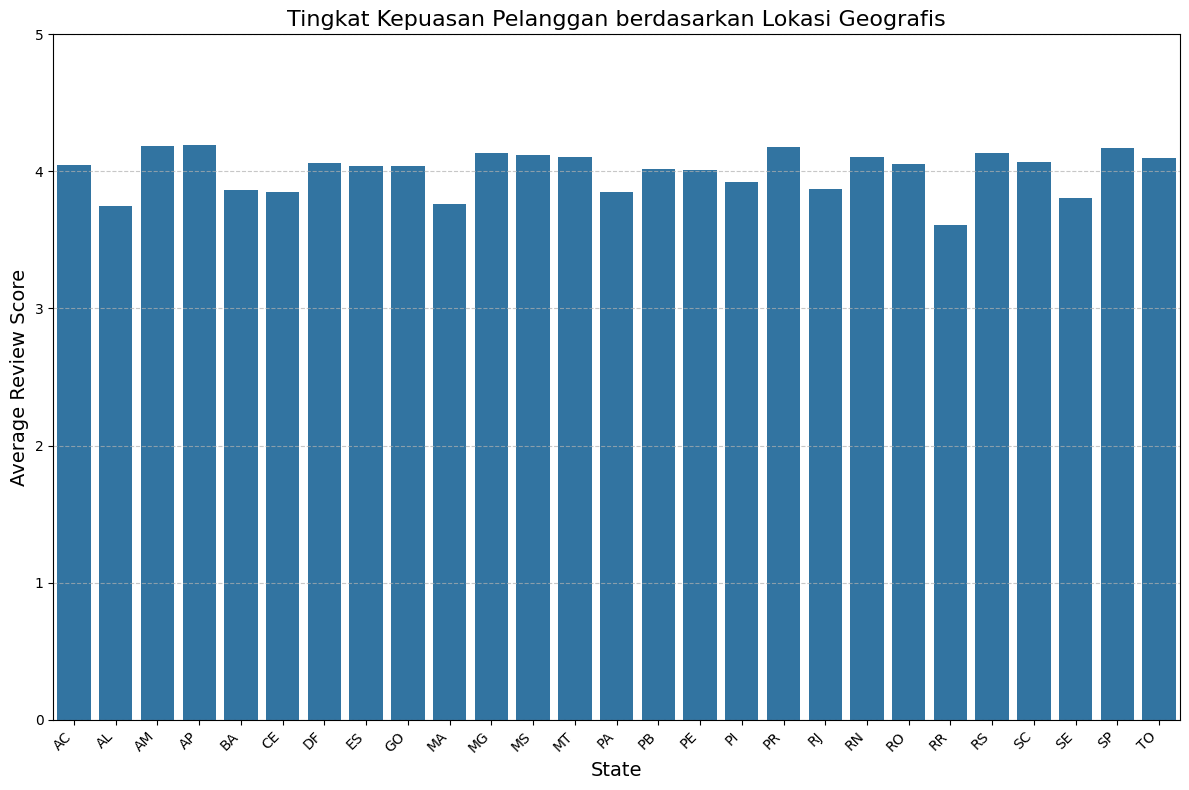

In [79]:
plt.figure(figsize=(12, 8))
sn.barplot(x='customer_state', y='review_score', data=average_review_score_by_state, legend=True)
plt.title('Tingkat Kepuasan Pelanggan berdasarkan Lokasi Geografis', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Review Score', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<sub> **Tingkat Kepuasan Pelanggan berdasarkan Lokasi Geografis dalam Tabel** </sub>

In [80]:
table = pd.DataFrame(average_review_score_by_state)
print(table)

   customer_state  review_score
0              AC      4.049383
1              AL      3.751208
2              AM      4.183673
3              AP      4.194030
4              BA      3.860888
5              CE      3.851016
6              DF      4.064711
7              ES      4.041667
8              GO      4.042490
9              MA      3.764075
10             MG      4.136172
11             MS      4.118785
12             MT      4.102990
13             PA      3.849174
14             PB      4.018832
15             PE      4.011543
16             PI      3.920570
17             PR      4.180032
18             RJ      3.874971
19             RN      4.105809
20             RO      4.051587
21             RR      3.608696
22             RS      4.133321
23             SC      4.071764
24             SE      3.808023
25             SP      4.173951
26             TO      4.096774


<sub> **Simpan dataframe ke file csv** </sub>

In [81]:
average_review_score_by_state.to_csv('tingkat_kepuasan_pelanggan.csv', index=False)

Insight dari output analisis tersebut adalah sebagai berikut:

1. Terlihat bahwa  kepuasan pelanggan berbeda-beda di setiap negara bagian. Beberapa negara bagian memiliki  kepuasan pelanggan yang tinggi dengan peringkat rata-rata di atas 4, sementara negara bagian lainnya memiliki kepuasan pelanggan yang  rendah dengan peringkat di bawah 4.
2. Perbedaan  kepuasan pelanggan dapat dikaitkan dengan faktor-faktor yang berbeda-beda di setiap wilayah, seperti layanan pengiriman, kualitas produk, dan interaksi pelanggan.
3. Dengan memahami perbedaan dalam kepuasan pelanggan maka dapat memudahkan dalam pengidentifikasian area potensial dimana layanan yang perlu ditingkatkan atau strategi pemasaran yang lebih dikembangkan.
4. Analisis ini  memberikan wawasan mengenai area di mana peningkatan layanan dan peningkatan pengalaman pelanggan diperlukan untuk meningkatkan  kepuasan pelanggan.


### Pertanyaan 2: Bagaimana hubungan antara lokasi geografis pelanggan dengan frekuensi pembelian?

<sub> **Visualisasi dalam bentuk diagram batang yang menunjukkan hubungan antara lokasi geografis pelanggan dengan frekuensi pembelian** </sub>

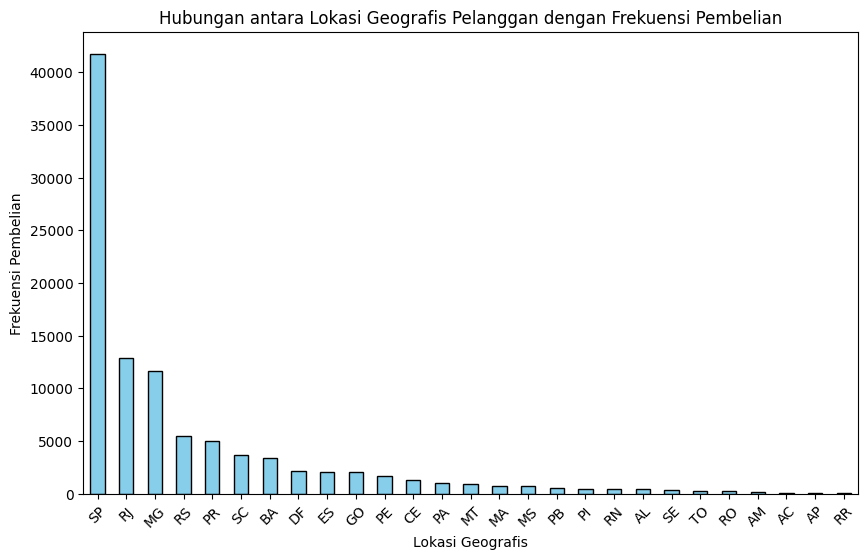

In [82]:
plt.figure(figsize=(10, 6))
customers_df['customer_state'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Hubungan antara Lokasi Geografis Pelanggan dengan Frekuensi Pembelian')
plt.xlabel('Lokasi Geografis')
plt.ylabel('Frekuensi Pembelian')
plt.xticks(rotation=45)
plt.show()

<sub> **Dalam bentuk tabel** </sub>

In [83]:
table = pd.DataFrame(customers_df['customer_state'].value_counts())
print(table)

    customer_state
SP           41746
RJ           12852
MG           11635
RS            5466
PR            5045
SC            3637
BA            3380
DF            2140
ES            2033
GO            2020
PE            1652
CE            1336
PA             975
MT             907
MA             747
MS             715
PB             536
PI             495
RN             485
AL             413
SE             350
TO             280
RO             253
AM             148
AC              81
AP              68
RR              46


Insight dari output analisis tersebut adalah sebagai berikut:

1. Negara bagian São Paulo (SP) memiliki jumlah pelanggan tertinggi dan jauh lebih tinggi dibandingkan  negara bagian lain. Hal ini menunjukkan bahwa São Paulo memiliki pangsa pasar yang besar dalam operasional perusahaan.
2. Negara bagian memiliki potensi pasar yang besar, dengan banyak pelanggan seperti São Paulo (SP), Rio de Janeiro (RJ), dan Minas Gerais (MG).
3. Dengan membandingkan jumlah pelanggan di berbagai negara bagian, perusahaan dapat mengevaluasi kinerja penjualan  di setiap wilayah. Memudahkan dalam merencanakan strategi pemasaran yang lebih efektif dan mengoptimalkan alokasi sumber daya.

### Pertanyaan 3:  Bagaimana tren pembelian bulanan dari waktu ke waktu?

<sub> **Konversi kolom waktu pembelian menjadi tipe datetime** </sub>

In [84]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

<sub> **Jumlah pembelian setiap bulan** </sub>

In [85]:
monthly_purchase = orders_df.resample('M', on='order_purchase_timestamp').size()

<sub> **Visualisasi tren waktu jumlah pembelian setiap bulan** </sub>

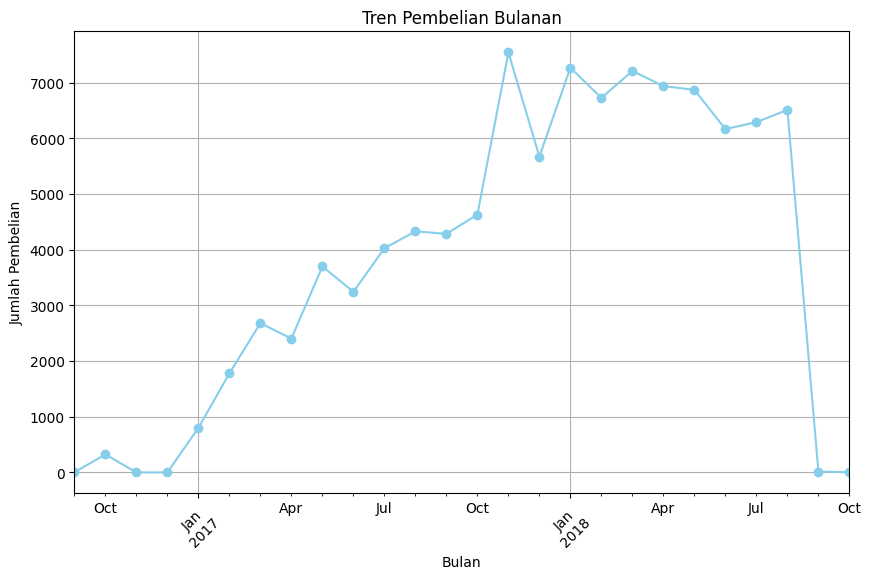

In [86]:
plt.figure(figsize=(10, 6))
monthly_purchase.plot(kind='line', marker='o', linestyle='-', color='skyblue')
plt.title('Tren Pembelian Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pembelian')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<sub> **Dalam bentuk tabel** </sub>

In [87]:
table = pd.DataFrame(monthly_purchase)
print(table)

                             0
order_purchase_timestamp      
2016-09-30                   4
2016-10-31                 324
2016-11-30                   0
2016-12-31                   1
2017-01-31                 800
2017-02-28                1780
2017-03-31                2682
2017-04-30                2404
2017-05-31                3700
2017-06-30                3245
2017-07-31                4026
2017-08-31                4331
2017-09-30                4285
2017-10-31                4631
2017-11-30                7544
2017-12-31                5673
2018-01-31                7269
2018-02-28                6728
2018-03-31                7211
2018-04-30                6939
2018-05-31                6873
2018-06-30                6167
2018-07-31                6292
2018-08-31                6512
2018-09-30                  16
2018-10-31                   4


<sub> **Simpan dataframe ke file csv** </sub>

In [88]:
monthly_purchase.to_csv('monthly_purchase.csv', index=False)

Insight dari output analisis tersebut adalah sebagai berikut:

1. Tren penjualan menunjukkan peningkatan yang signifikan dari September 2016 hingga November 2017.
2. Setelah mencapai puncaknya pada November 2017, terjadi penurunan jumlah pembelian, meskipun masih ada fluktuasi yang terjadi hingga akhir periode analisis pada Oktober 2018.
3. Penurunan yang signifikan setelah November 2017 dapat menjadi perhatian untuk mengevaluasi faktor-faktor yang mempengaruhi, seperti perubahan musiman, strategi pemasaran, atau kondisi pasar.

### Pertanyaan 4:  Bagaimana tren penggunaan metode pembayaran yang berbeda, berubah dari waktu ke waktu?

<sub> **Merge data dari tabel orders_df dengan order_pays berdasarkan order_id** </sub>

In [89]:
merged_data = orders_df.merge(order_pays[['order_id', 'payment_type']], on='order_id')

<sub> **Kolom order_purchase_timestamp diubah menjadi tipe datetime** </sub>

In [90]:
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])

<sub> **Bulan dan tahun diambil dari tanggal pembelian** </sub>

In [91]:
merged_data['order_month'] = merged_data['order_purchase_timestamp'].dt.to_period('M')

<sub> **Jumlah transaksi pembayaran untuk setiap metode pembayaran dalam setiap bulan dan tahun** </sub>

In [92]:
payment_method_trend = merged_data.groupby(['order_month', 'payment_type']).size().unstack(fill_value=0)

<sub> **Visualisasi tren penggunaan metode pembayaran dari waktu ke waktu** </sub>

<Figure size 1200x800 with 0 Axes>

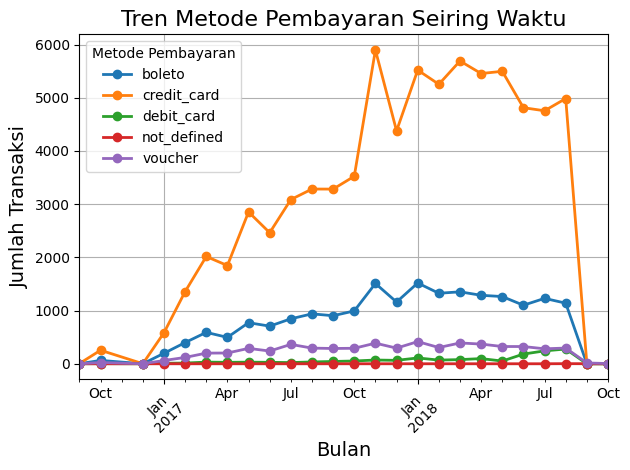

In [93]:
plt.figure(figsize=(12, 8))
payment_method_trend.plot(kind='line', marker='o', linewidth=2)
plt.title('Tren Metode Pembayaran Seiring Waktu', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Jumlah Transaksi', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Metode Pembayaran')
plt.grid(True)
plt.tight_layout()
plt.show()

<sub> **Dalam bentuk tabel** </sub>

In [94]:
table = pd.DataFrame(payment_method_trend)
print(table)

payment_type  boleto  credit_card  debit_card  not_defined  voucher
order_month                                                        
2016-09            0            3           0            0        0
2016-10           63          254           2            0       23
2016-12            0            1           0            0        0
2017-01          197          583           9            0       61
2017-02          398         1356          13            0      119
2017-03          590         2016          31            0      200
2017-04          496         1846          27            0      202
2017-05          772         2853          30            0      289
2017-06          707         2463          27            0      239
2017-07          845         3086          22            0      364
2017-08          938         3284          34            0      294
2017-09          903         3283          43            0      287
2017-10          993         3524          52   

<sub> **Simpan dataframe ke file csv** </sub>

In [95]:
payment_method_trend.to_csv('payment_method.csv', index=False)


Insight dari output analisis tersebut adalah:

1. Penggunaan kartu kredit (credit_card) merupakan metode pembayaran yang paling umum digunakan dari bulan ke bulan, diikuti oleh metode pembayaran voucher dan boleto.
2. Tren penggunaan metode pembayaran boleto, kartu kredit, dan voucher cenderung meningkat dari waktu ke waktu, menunjukkan peningkatan dalam aktivitas pembelian secara keseluruhan.
3. Penggunaan metode pembayaran debit card relatif stabil sepanjang waktu, dengan sedikit variasi dalam jumlah transaksi.
4. Metode pembayaran not_defined hanya muncul pada bulan-bulan tertentu dan jumlahnya tidak signifikan, sehingga dapat diabaikan dalam analisis tren pembayaran.

## Conclusion

- Berdasarkan analisis tingkat kepuasan pelanggan berdasarkan lokasi geografis, dapat disimpulkan bahwa persepsi pelanggan terhadap layanan perusahaan bervariasi di berbagai negara bagian. Ditemukan bahwa beberapa negara bagian memiliki tingkat kepuasan yang tinggi dengan skor ulasan rata-rata di atas 4, sementara yang lain memiliki tingkat kepuasan yang lebih rendah dengan skor ulasan di bawah 4. Perbedaan ini menunjukkan bahwa ada faktor-faktor tertentu di setiap wilayah yang mempengaruhi pengalaman pelanggan. Analisis ini memberikan wawasan tentang area mana yang mungkin memerlukan perbaikan layanan atau peningkatan strategi pemasaran untuk meningkatkan kepuasan pelanggan.
- Berdasarkan analisis grafik distribusi pelanggan berdasarkan negara bagian, dapat disimpulkan bahwa São Paulo (SP) menjadi negara bagian dengan jumlah pelanggan tertinggi, dengan jumlah yang jauh lebih besar dibandingkan dengan negara bagian lainnya. Hal ini menunjukkan dominasi pasar yang signifikan di São Paulo dan menegaskan posisinya sebagai pusat bisnis utama di Brasil. Selain itu, negara bagian seperti Rio de Janeiro (RJ) dan Minas Gerais (MG) juga menunjukkan potensi pasar yang besar dengan jumlah pelanggan yang signifikan.
- Dari output analisis tersebut, dapat dilihat bahwa terdapat tren kenaikan jumlah pembelian setiap bulan dari awal periode (September 2016) hingga puncaknya pada November 2017. Setelah itu, terjadi penurunan jumlah pembelian, meskipun masih relatif tinggi, dan fluktuasi jumlah pembelian terjadi hingga akhir periode analisis pada Oktober 2018. Penurunan yang signifikan terjadi setelah puncak pada November 2017, kemungkinan dipengaruhi oleh faktor-faktor musiman atau perubahan dalam strategi pemasaran atau kondisi pasar.
- Tren penggunaan metode pembayaran dari waktu ke waktu menunjukkan bahwa penggunaan kartu kredit (credit_card) cenderung meningkat secara signifikan dari bulan ke bulan. Selain itu, penggunaan metode pembayaran boleto dan voucher juga mengalami peningkatan yang cukup signifikan. Meskipun demikian, penggunaan metode pembayaran debit card relatif stabil, sementara metode pembayaran not_defined muncul dalam jumlah yang sangat sedikit. Kesimpulannya, terdapat kecenderungan menuju penggunaan metode pembayaran elektronik seperti kartu kredit, yang menunjukkan pergeseran preferensi konsumen terhadap pembayaran online.